In [1]:
import os
import importlib

os.chdir('/mnt/spmm-benchmark')
print(os.getcwd())

import src.benchmark as bm
import pandas as pd
import matplotlib.pyplot as plt

/mnt/spmm-benchmark
using build


In [2]:
from src.mtx import *
A_pattern = read_pattern('/mnt/dlmc/rn50/random_pruning/0.7/bottleneck_3_block_group3_5_1.smtx')
A_dense = pattern_to_dense(A_pattern)
_A_dense = get_mtx('/mnt/dlmc/rn50/random_pruning/0.7/bottleneck_3_block_group3_5_1.smtx')

#print(len(A_dense), len(A_dense[0]))
#print(len(_A_dense), len(_A_dense[0]))
print(any([any(A_dense[i] == _A_dense[i]) for i in range(len(A_dense))] + [len(A_dense) == len(_A_dense)]))


True


In [3]:
# Always load latest for dev purposes
import src
importlib.reload(src.benchmark_cpp)
importlib.reload(bm)

# Reduce for now so it doesn't take forever
bm.BURN_ITERS = 2
bm.REPS = 5
result = bm.resnet_exp("/mnt/dlmc/rn50")

using build


In [7]:
df = pd.DataFrame(result)
df['normalized_time'] = df['time'] / df['nnz']
print(df)

      sparsity_est    row_mean    row_std   row_cov    col_mean    col_std  \
0              0.7   76.799805   7.435659  0.096819  307.199219  15.865504   
1              0.7  691.199219  22.549671  0.032624   76.799913   8.125768   
2              0.7  153.597656  10.694179  0.069625   76.798828   7.892871   
3              0.7   19.187500   4.038390  0.210470   19.187500   3.622305   
4              0.7  307.199707  14.860374  0.048374  614.399414  22.913553   
...            ...         ...        ...       ...         ...        ...   
1017           0.8  102.466309  25.859556  0.252371  409.865234  90.158668   
1018           0.8  461.097656  92.373616  0.200334   51.233073  13.071681   
1019           0.8   12.808594   8.385167  0.654652   51.234375  33.694743   
1020           0.8   25.617188  18.334936  0.715728  102.468750  28.659078   
1021           0.8  204.933594  33.240828  0.162203   51.233398  15.637408   

       col_cov  cov_diff     nnz      time                     

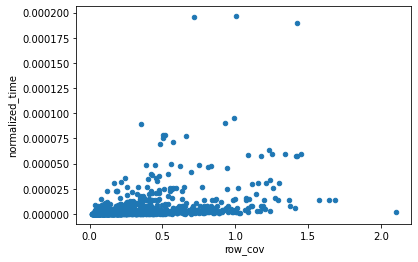

In [9]:
df.plot.scatter(x='row_cov', y='normalized_time')
plt.savefig('/mnt/spmm-benchmark/row_cov.jpeg')

In [6]:
plot_sparsity(0.9, result)

NameError: name 'plot_sparsity' is not defined

In [ ]:
plot_sparsity(0.5, result)

In [ ]:
a = {1:"a", 2:'b'}
list(a.values())

In [ ]:
def plot_method(method_name, result):
  tmp = {} 
  sparsity_levels = []
  for k, v in result.items():
    if k[0] == method_name:
      v = sorted(v.items(), key=lambda x: x[0])
      tmp[k[1]] = [i[1] for i in v]
      size = len(v)
      sparsity_levels.append(k[1])
  sparsity_levels = sorted(sparsity_levels)
  index = list(range(size))
  df = pd.DataFrame(tmp, index=index)
  df = df[sparsity_levels]
  df.plot.bar(figsize=(16,9))  
  plt.xlabel("layer number")
  plt.ylabel("runtime (ms)")
  plt.title("runtime distribution using {}".format(method_name))


In [ ]:
plot_method("magnitude_pruning", result)

In [ ]:
rn50_result_to_csv(result, "rn50_time")